In [1]:
!pip install faster-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [2]:
from faster_whisper import WhisperModel

model_size = "large-v3"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

vocabulary.json:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

In [4]:
segments, info = model.transcribe("/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.mp3", beam_size=5)

print("Detected language '%s' with probability %f" % (info.language, info.language_probability))

for segment in segments:
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
segments, info = model.transcribe("/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.mp3", beam_size=5)

print("Detected language '%s' with probability %f" % (info.language, info.language_probability))

for segment in segments:
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))

Detected language 'en' with probability 0.997559
[0.96s -> 4.48s]  I want the job role for data science as a fresher.
[7.76s -> 16.32s]  Well, I'm currently doing my B.Tech degree in data science. Thank you.
[16.32s -> 19.92s]  So I've worked with some real-world data science projects which includes working with
[20.56s -> 25.92s]  recommendation systems and sentiment analysis and I've used scikit-learn library and python


[25.92s -> 31.52s]  as the programming language for getting the same. So I used basic supervised learning.
Detected language 'en' with probability 0.997559
[0.96s -> 4.48s]  I want the job role for data science as a fresher.
[7.76s -> 16.32s]  Well, I'm currently doing my B.Tech degree in data science. Thank you.
[16.32s -> 19.92s]  So I've worked with some real-world data science projects which includes working with
[20.56s -> 25.92s]  recommendation systems and sentiment analysis and I've used scikit-learn library and python
[25.92s -> 31.52s]  as the programming language for getting the same. So I used basic supervised learning.


In [5]:
!pip install pydub

In [7]:
from pydub.silence import split_on_silence
from pydub import AudioSegment

input_file = "/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.wav"
sound_file = AudioSegment.from_wav(input_file)
audio_chunks = split_on_silence(sound_file,
	    # must be silent for at least 50 ms
	    min_silence_len=1000,

	    # consider it silent if quieter than -16 dBFS
	    silence_thresh=-32
	)

In [8]:
len(sound_file)

33144

In [9]:
len(audio_chunks)

5

In [10]:
total_length = sum([len(chunk) for chunk in audio_chunks])

In [11]:
total_length

17395

In [12]:
[len(chunk) for chunk in audio_chunks]

[3011, 2293, 3235, 5477, 3379]

In [13]:
# mysp=__import__("my-voice-analysis")

In [16]:
import librosa
import soundfile as sf

def resample_audio(input_file, output_file, target_sr=44100, target_resolution='PCM_16'):
    # Load audio file
    y, sr = librosa.load(input_file, sr=None)

    # Resample audio to target sample rate
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    # Save resampled audio to file
    sf.write(output_file, y_resampled, samplerate=target_sr, subtype=target_resolution)
    print(f"Audio resampled and saved to {output_file}")

# Example usage: Resample input.wav to 44 kHz sample rate and 16-bit resolution
input_file = "/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.wav"
output_file = "output_resampled.wav"
# resample_audio(input_file, output_file, target_sr=44100, target_resolution='PCM_16')


In [18]:
import librosa
import numpy as np

def calculate_pitch_variation(audio_file, frame_length=2048, hop_length=512, threshold=2000):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract pitch (fundamental frequency) using librosa's piptrack
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)
    print(sum(pitches))
    # Calculate pitch variation
    pitch_variation = np.var(pitches[pitches > threshold])  # Ignore pitches below threshold

    return pitch_variation

audio_file = "/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.wav"
variation = calculate_pitch_variation(audio_file)
print("Pitch Variation:", variation)


[    0.       0.       0.   ... 32425.76 24437.3  14238.9 ]
Pitch Variation: 296079.9


In [19]:
segments, info = model.transcribe("/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.mp3", beam_size=5)

print("Detected language '%s' with probability %f" % (info.language, info.language_probability))
seg = []
start = []
end = []
for segment in segments:
    seg.append(segment.text)
    start.append(segment.start)
    end.append(segment.end)
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))

Detected language 'en' with probability 0.997559
[0.96s -> 4.48s]  I want the job role for data science as a fresher.
[7.76s -> 16.32s]  Well, I'm currently doing my B.Tech degree in data science. Thank you.
[16.32s -> 19.92s]  So I've worked with some real-world data science projects which includes working with
[20.56s -> 25.92s]  recommendation systems and sentiment analysis and I've used scikit-learn library and python
[25.92s -> 31.52s]  as the programming language for getting the same. So I used basic supervised learning.


In [20]:
seg

[' I want the job role for data science as a fresher.',
 " Well, I'm currently doing my B.Tech degree in data science. Thank you.",
 " So I've worked with some real-world data science projects which includes working with",
 " recommendation systems and sentiment analysis and I've used scikit-learn library and python",
 ' as the programming language for getting the same. So I used basic supervised learning.']

In [21]:
start

[0.96, 7.76, 16.32, 20.56, 25.92]

In [22]:
leng = [len(sent.split()) for sent in  seg]

In [23]:
wpm = [(l*60)/(e-s) for l,s,e in zip(leng,start,end)]

In [24]:
wpm

[187.49999999999997,
 84.11214953271028,
 216.66666666666657,
 134.32835820895514,
 149.99999999999997]

In [25]:
avg_wpm = sum(leng)*60/(end[-1]-start[0])

In [26]:
avg_wpm

121.72774869109946

In [27]:
import numpy as np

In [28]:
np.average(wpm)

154.52143488166638

In [29]:
!pip install noisereduce

In [31]:
import librosa
import numpy as np
import noisereduce as nr
def calculate_rms_energy(y, frame_length=2048, hop_length=512):
    # Split the audio into parts
    num_frames = len(y) // hop_length
    rms_energy_array = np.zeros(num_frames)

    for i in range(num_frames):
        start = i * hop_length
        end = start + frame_length
        frame = y[start:end]
        rms_energy_array[i] = np.sqrt(np.mean(frame ** 2))

    # Min-Max normalization
    rms_energy_norm = (rms_energy_array - np.min(rms_energy_array)) / (np.max(rms_energy_array) - np.min(rms_energy_array) + 0.01)

    return rms_energy_norm

def calculate_pitch_variance(y, sr, frame_length=2048, hop_length=512, threshold=1000):
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)

    pitch_variation = np.sqrt(np.var(pitches[pitches > threshold]))

    return pitch_variation / (np.max(pitches)+0.1)

def calculate_wpm(segments):
    # segments, info = model.transcribe(audio_file, beam_size=5)

    seg = []
    start = []
    end = []
    for segment in segments:
      seg.append(segment.text)
      start.append(segment.start)
      end.append(segment.end)

    leng = [len(sent.split()) for sent in  seg]

    wpm = [(l*60)/(e-s) for l,s,e in zip(leng,start,end)]

    return np.average(wpm)

def calculate_fluency_confidence(audio_file,segments):
    y, sr = librosa.load(audio_file, sr=None)
    y = nr.reduce_noise(y=y, sr=sr)
    rms_energy_norm = calculate_rms_energy(y)
    rms_energy = np.mean(rms_energy_norm)

    speech_rate = len(y) / sr
    wpm = calculate_wpm(segments)

    pitch_variance = calculate_pitch_variance(y, sr)

    pitch_variance_norm = 1 - pitch_variance

    fluency_score = (0.2*rms_energy + 0.5*(wpm / 120) + 0.3*(pitch_variance_norm))
    confidence_score = (0.1*rms_energy + 0.9*pitch_variance_norm)

    return fluency_score, confidence_score

audio_file = "/content/WhatsApp Audio 2024-04-12 at 18.01.36_510e2a73.mp3"
segments, info = model.transcribe(audio_file, beam_size=5)
fluency, confidence = calculate_fluency_confidence(audio_file,segments)
print("Fluency Score:", min(10,10*fluency))
print("Confidence Score:", min(10,10*(confidence)))

Fluency Score: 8.984738506280767
Confidence Score: 7.350284437397574


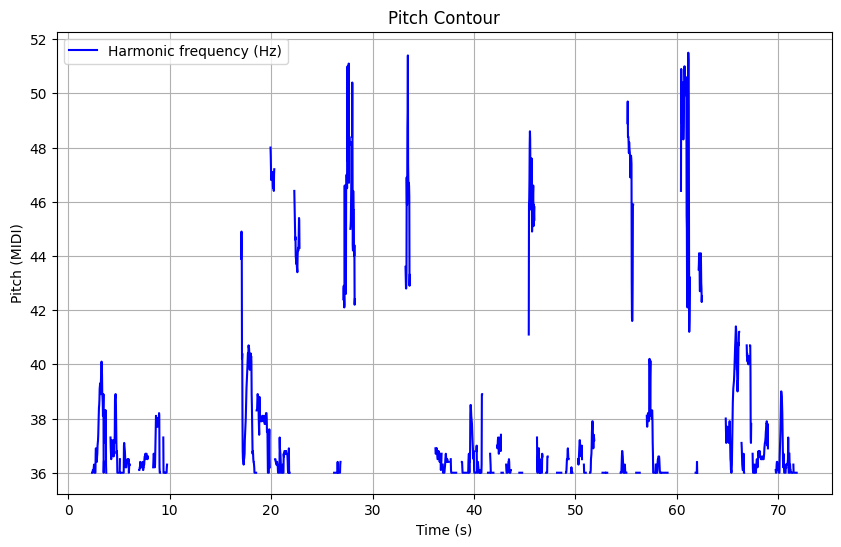

In [33]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load audio file
# audio_file = "/content/2830-3980-0043.wav"  # Replace with your audio file path
y, sr = librosa.load(audio_file, sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
hop_length = 512
n_fft = 2048
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert STFT to amplitude and phase
amplitude = np.abs(stft)
phase = np.angle(stft)

# Calculate the fundamental frequency (pitch) using Harmonic-Percussive Source Separation (HPSS)
harmonic, percussive = librosa.effects.hpss(y)
f0_harmonic, voiced_flag, voiced_probs = librosa.pyin(harmonic, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Calculate pitch range and variability
pitch_range = np.max(f0_harmonic) - np.min(f0_harmonic)
pitch_std = np.std(f0_harmonic)

# Calculate pitch stability (optional)
pitch_stability = np.mean(librosa.feature.delta(f0_harmonic))

# Plot pitch contour
times = librosa.times_like(f0_harmonic)
plt.figure(figsize=(10, 6))
plt.plot(times, librosa.hz_to_midi(f0_harmonic), label='Harmonic frequency (Hz)', color='b')
plt.ylabel('Pitch (MIDI)')
plt.xlabel('Time (s)')
plt.title('Pitch Contour')
plt.legend()
plt.grid()
plt.show()

# Confidence detection based on pitch analysis
if pitch_std > 0:  # Avoid division by zero
    confidence_score = 1 - (pitch_range / (pitch_std + 1e-9))
else:
    confidence_score = 0  # Set confidence to a default value if pitch_std is zero
